# Notebook 1: Introduction to h329

We use smooth particle hydrodynamic cosmological simulations to further our understanding of the physics driving galaxy evolution. Our simulated galaxies evolve until present day (13.8 billion years).

The h329 galaxy is a star forming, Milky-Way mass, spiral galaxy and all analyses in the following notebooks are conducted at redshift zero (present day). The h329 galaxy is simulated at high resolution (170 pc resolution). 

The simulation data includes gas, stars, and dark matter. This notebook includes a bit of introductory plots using the gas and stellar particles. For the most part, dark matter particles are ignored in this series of notebooks (except for the total mass of the galaxies which were given to me). 

The goals of these analyses are to explore whether the h329 galaxy is a contender for further examining of stellar properties and behavior. To be a good sample, the h329 galaxy needs to mimic our own Milky-Way galaxy's morphology to a high enough degree that we can compare these galaxies (and other Milky-Way-like galaxies) to one another.

## Setup of everything that needs to run

### Data Setup

In [1]:
import astropy

import matplotlib.pyplot as plt
import pynbody
from pynbody.analysis import profile
from scipy.optimize import curve_fit

from morgans_sim_setup import *
import numpy as np
import pandas as pd

% matplotlib inline

In [2]:
## Pathway to the simulation galaxy data: 

path_to_h329 = '/astro/store/gradscratch/tmp/sanchenn/h329gsonly_4096/h329.cosmo50PLK.3072gst5HbwK1BH.004096_gsonly'
h329, h329_h, h329_h1 = sim_setup(path_to_h329) 

## sim_setup is my code created to do the pynbody.load, physical_units(), sim.halos(), and make face-on for me 
## h329 is galaxy, h329_h is entire halo object, and h329_h1 is main halo
    ## We mainly use h329 or h329_h1

loading sim
making faceon


In [3]:
## Profiles Set up

## Gas particles profile:
h329_p_g = pynbody.analysis.profile.Profile(h329_h1.g, vmin =.01)
# Star particles profile:
h329_p_s = pynbody.analysis.profile.Profile(h329_h1.s, vmin =.01)

## Comparison of virial radius to max radius of the simulation
h329_Rvir = pynbody.analysis.halo.virial_radius(h329_h1) 
h329_Rmax = h329_h1.g['r'].max() ##This is R_MAX

print(h329_Rmax, h329_Rvir)

241.5968246100956 156.66934749611534


#### Defining Other Arrays
How to define other arrays and create new ones using the arrays we already have: 
    
    h1.g[‘mass’] * h1.g[‘OxMassFrac’] = mass in oxygen

In [4]:
## This is a reminder for me in case it was necessary to create new arrays

h329_h1.g['MassOxTot'] = h329_h1.g['mass'] * h329_h1.g['OxMassFrac']
## If we wanted the total oxygen mass (to explore column density for example) we can take the mass of the main halo and multiply it by the oxygen mass fraction property

## General Plots and Background of h329

### Star Formation History 

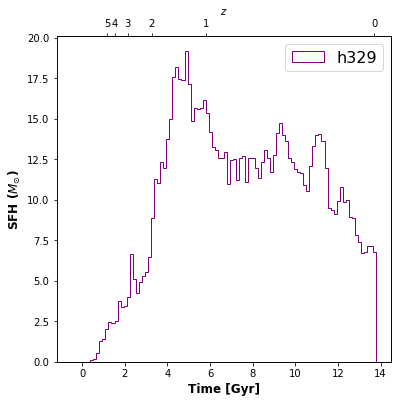

In [7]:
#Star formation history of the h329 simulation galaxy

fig = plt.figure(figsize=[6,6])

pynbody.plot.stars.sfh(h329.s,bins=100, color='purple', label = 'h329')
plt.legend(fontsize=16)
plt.xlabel('Time [Gyr]', fontweight='bold')
plt.ylabel(r'SFH ($M_{\odot}$)', fontweight='bold')
plt.tick_params(axis='both', which='major')

From this we see that h329 is a star forming galaxy and has had active star formation rate throughout it's lifetime. It's important to note too where some peaks are and lows are. The star formation rate peaks fairly high around 5 Gyr (z=1.1-ish). From there the rate decreases, flattens out for a few Gyrs and then is the lowest (since the peak) at present day redshift 0 (13.8 Gyr). 

### Stellar Renders

/astro/apps6/anaconda2.0/envs/py3/lib/python3.5/site-packages/pynbody/sph/__init__.py:581: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = np.zeros((ny, nx), dtype=np.float32)
/astro/apps6/anaconda2.0/envs/py3/lib/python3.5/site-packages/pynbody/plot/stars.py:51: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  brightest_mag.append(ordered[-len(ordered) / 5000])


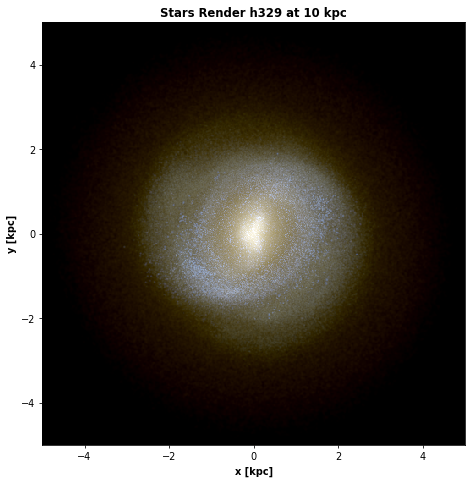

In [9]:
## Stellar renders use pynbody render function and we call back on our star particles (h1 is main halo described in beginning)

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_h1.s, width = '10 kpc', dynamic_range=3) ## dynamic range helps us see the fainter areas!
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 at 10 kpc', fontweight='bold')

/astro/apps6/anaconda2.0/envs/py3/lib/python3.5/site-packages/pynbody/sph/__init__.py:581: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = np.zeros((ny, nx), dtype=np.float32)
/astro/apps6/anaconda2.0/envs/py3/lib/python3.5/site-packages/pynbody/plot/stars.py:51: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  brightest_mag.append(ordered[-len(ordered) / 5000])


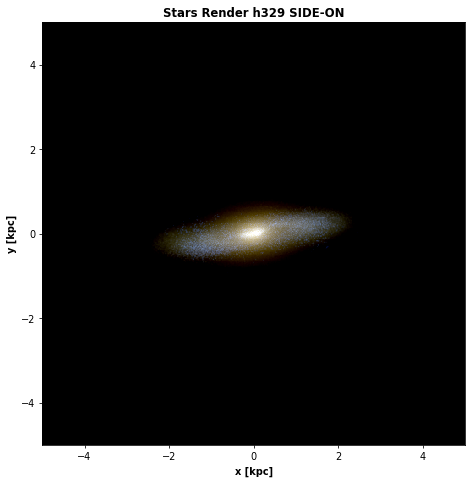

In [6]:
## Stellar render but side on view 
    ## Notice how the side-on is not perfectly parallel with the plane? This will be important later on!

pynbody.analysis.angmom.sideon(h329_h1) ## This is what turns the galaxy halo side-on for the plot

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_h1.s, width = '10 kpc') ## dynamic range on or off?
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 SIDE-ON', fontweight='bold');

In [20]:
## Don't forget we need to turn the galaxy back to face-on now!

pynbody.analysis.angmom.faceon(h329_h1)

## Exploring Other Properties of h329

Along with SFH and Stellar Renders we are able to explore the star and gas particles in our simulation of h329 with pynbody .sph.image functions! For example we can decide we would like to look at gas particles - then we need to call on a specific property like mass of the gas particles in the galaxy, temperature of the galaxy can be plotted this way, and angular momentum, and many more. You can explore all properties by doing .derivable_keys(). 

### Gas Density and Temperature of h329

/astro/apps6/anaconda2.0/envs/py3/lib/python3.5/site-packages/pynbody/sph/__init__.py:581: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = np.zeros((ny, nx), dtype=np.float32)


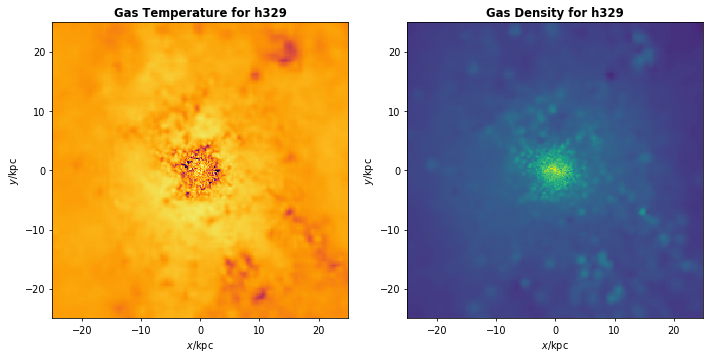

In [8]:
## Plot the gas density and temperature by calling on the main halo's gas particles and specifying the quantity desired

fig, axs = plt.subplots(1, 2, figsize=[12, 12], dpi=70)

pynbody.plot.sph.image(h329_h1.g, qty='temp', width=100, cmap='inferno', show_cbar=False, subplot=axs[0])
axs[0].set_title('Gas Temperature for h329', fontweight = 'bold')
axs[0].set_xlim(-25, 25)
axs[0].set_ylim(-25, 25)

pynbody.plot.sph.image(h329_h1.g, qty='rho', width=100, cmap='viridis', show_cbar=False, subplot=axs[1])
axs[1].set_title('Gas Density for h329', fontweight = 'bold')
axs[1].set_xlim(-25, 25)
axs[1].set_ylim(-25, 25);

## A Few Introductory Profiles of h329

Profiles are a great way to explore galaxies. They offer a graphical representation of the properties for the gas and stellar particles in the simulation. They are typically formatted as one property of the gas or stars on the y-axis versus radius (or even z direction / thickness) on the x-axis.

The profile takes slices (from the 'rbins' property - see below example) to add up everything correlated to the specified property in that section of the galaxy, and does these slices over the entire radial direction outward to the edge of the simulated galaxy.

### Stellar Mass

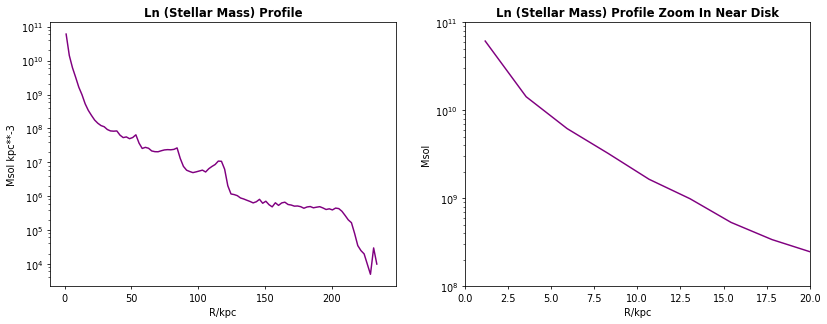

In [11]:
## Refer to your profiles we created at the beginning! 
    ## We want the stellar mass so call on the profile made with h329 star particles and specify your property (mass in this case)

fig, axs = plt.subplots(1, 2, figsize=[14, 5], dpi=70)

axs[0].plot(h329_p_s['rbins'], h329_p_s['mass'], color = 'purple')
axs[0].set_title('Ln (Stellar Mass) Profile', fontweight='bold')
axs[0].set_xlabel('R/kpc') 
axs[0].set_ylabel('Msol kpc**-3')
axs[0].semilogy() ## Makes y axis ln

axs[1].plot(h329_p_s['rbins'], h329_p_s['mass'], color='purple')
axs[1].set_title('Ln (Stellar Mass) Profile Zoom In Near Disk', fontweight='bold')
axs[1].set_xlabel('R/kpc') 
axs[1].set_ylabel('Msol')
axs[1].set_xlim(0, 20)
axs[1].set_ylim(1e8, 1e11)
axs[1].semilogy();

Stellar mass cuts off at the max radius (defined at the beginning to be about 241 kpc). Near 200 kpc the stellar mass drops off as well. 

### Exploring Gas: Metallicity

There are many other properties to explore for h329. Some examples of the gas particle exploration are provided below!

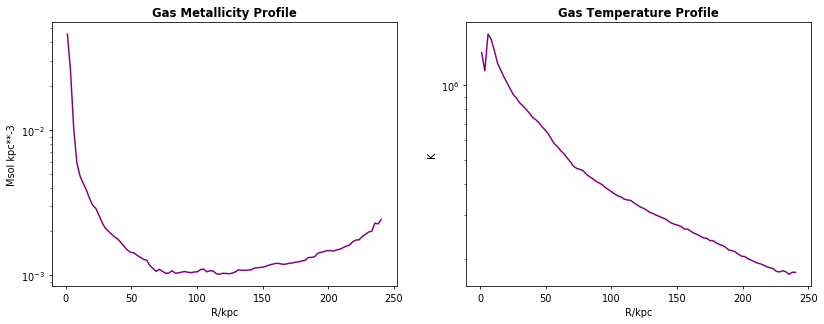

In [15]:
fig, axs = plt.subplots(1, 2, figsize=[14, 5], dpi=70)

## You can look at metallicity if you want: call on profile made with gas particles and the 'metals' property
    ## To see what the names are of the properties use .derivable_keys()
axs[0].plot(h329_p_g['rbins'], h329_p_g['metals'], color='purple')
axs[0].set_title('Gas Metallicity Profile', fontweight='bold')
axs[0].set_xlabel('R/kpc') 
axs[0].set_ylabel('Msol kpc**-3')
axs[0].semilogy()

## We can look at gas temperature again but as a profile
axs[1].plot(h329_p_g['rbins'], h329_p_g['temp'], color = 'purple')
axs[1].set_title('Gas Temperature Profile', fontweight='bold')
axs[1].set_xlabel('R/kpc') 
axs[1].set_ylabel('K')
axs[1].semilogy();

## Stellar Mass of h329

Another helpful number to know is the total stellar mass of the h329 galaxy.

In [21]:
## Call on h329 star particles and mass property and use sum() function
h329_star_mass = h329.s['mass'].sum()
h329_star_mass / 1e10

SimArray(8.989530881750891, 'Msol')

The total stellar mass for h329 is 8.99e10 solar masses. 

# End

This wraps up most of the background concepts to explore before analyzing h329. In the next notebook we will look at the vertical profiles and look at the scale length and height.